### Leaky Integrate and Fire Neuron

* Import required modules

In [2]:
from numpy import *
from pylab import *

* Setup parameters and state variables

In [3]:
T        = 50          # total time to sumulate (msec)
dt       = 0.125       # simulation time step
time     = arange(0, T+dt, dt) # Time array
t_rest   = 0           # initial refractory time

* LIF properties

In [4]:
Vm       = zeros(len(time)) # potential (V) trace over time
Rm       = 1                # Resistance (kOhm)
Cm       = 10               # Capacitance (uF)
tau_m    = Rm * Cm          # Time constant
tau_ref  = 4                # refractory period (ms)
Vth      = 1                # spike threshold
V_spike  = 0.5              # spike delta (V)

* Stimulus

In [5]:
I        = 1.5              # input current (A)

* Iterate over each time step

(Note line 3 uses the forward Euler method for numerical integration applied to the LIF differential equation)

In [6]:
for i,t in enumerate(time):
    if t > t_rest:
        Vm[i] = Vm[i-1] + (-Vm[i-1] + I*Rm) / tau_m * dt
        if Vm[i] >= Vth:
            Vm[i] += V_spike
            t_rest = t + tau_ref

* Plot the membrane potential trace

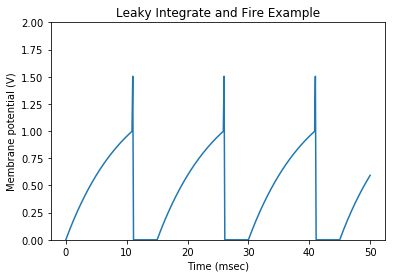

In [7]:
plot(time,Vm)
title('Leaky Integrate and Fire Example')
ylabel('Membrane potential (V)')
xlabel('Time (msec)')
ylim([0,2])
show()